# MODELO CNN 

# Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
from keras import backend as K
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display 
from PIL import Image
import h5py
import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import glob
import json

Using TensorFlow backend.


# Importing yoga dataset

In [3]:
data = pd.read_pickle("todos.pkl")

In [4]:
data.shape

(1022, 11)

In [5]:
data.head(3)

,pose,png,path,array,ardha matsyendrasana,bakasana,bitilasana,chaturanga dandasana,garudasana,vriksasana,gt
0,chaturanga dandasana,33-0.png,../img/chaturanga dandasana/33-0.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"
1,chaturanga dandasana,76-0.png,../img/chaturanga dandasana/76-0.png,"[[244, 244, 244, 244, 244, 243, 244, 244, 244,...",0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"
2,chaturanga dandasana,50-2.png,../img/chaturanga dandasana/50-2.png,"[[254, 255, 255, 175, 122, 145, 143, 146, 144,...",0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]"


In [7]:
data.columns

Index(['pose', 'png', 'path', 'array', 'ardha matsyendrasana', 'bakasana',
       'bitilasana', 'chaturanga dandasana', 'garudasana', 'vriksasana', 'gt'],
      dtype='object')

# Preparing & Running the model

In [8]:
X = np.stack(data['array'])
X = X / 255.0
y = np.stack(data['gt'])

In [9]:
y.shape

(1022, 6)

In [11]:
X.shape

(1022, 224, 224)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Tamaño de las imagenes
img_rows, img_cols = 224, 224

In [14]:
# para poner el canala que falta y poder pasarlo a h5
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [15]:
# Se ha intentado generar imágenes nuevas desde el dataset que teniamos, pero el resultado era peor (val_acc = 0.19)

'''#DATA AUGMENTATION

datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = datagen.flow(X_train,y_train)

validation_generator = datagen.flow(X_test,y_test)'''

'#DATA AUGMENTATION\n\ndatagen = ImageDataGenerator(rescale=1./255,\n                                   shear_range=0.2,\n                                   zoom_range=0.2,\n                                   horizontal_flip=True)\n\ntrain_generator = datagen.flow(X_train,y_train)\n\nvalidation_generator = datagen.flow(X_test,y_test)'

In [16]:
n_classes = 6
batch_size = 32

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train,y_train,
               batch_size = batch_size,
               epochs = 30,
               verbose = 1,
               validation_data = (X_test,y_test))

Train on 817 samples, validate on 205 samples
Epoch 1/30
817/817 [==============================] - 24s 29ms/step - loss: 1.8258 - accuracy: 0.1885 - val_loss: 1.7905 - val_accuracy: 0.1707
Epoch 2/30
817/817 [==============================] - 23s 28ms/step - loss: 1.7873 - accuracy: 0.1860 - val_loss: 1.7884 - val_accuracy: 0.1707
Epoch 3/30
817/817 [==============================] - 22s 27ms/step - loss: 1.7580 - accuracy: 0.2130 - val_loss: 1.7456 - val_accuracy: 0.3415
Epoch 4/30
817/817 [==============================] - 23s 28ms/step - loss: 1.6478 - accuracy: 0.2999 - val_loss: 1.5519 - val_accuracy: 0.5220
Epoch 5/30
817/817 [==============================] - 24s 29ms/step - loss: 1.4759 - accuracy: 0.4088 - val_loss: 1.4033 - val_accuracy: 0.5756
Epoch 6/30
817/817 [==============================] - 23s 29ms/step - loss: 1.3604 - accuracy: 0.4614 - val_loss: 1.2217 - val_accuracy: 0.6878
Epoch 7/30
817/817 [==============================] - 22s 27ms/step - loss: 1.3267 - accur

In [17]:
# Se ha intentado generar imágenes nuevas desde el dataset que teniamos, pero el resultado era peor (val_acc = 0.19)
'''STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

model.fit_generator(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID)'''

'STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size\nSTEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size\n\nmodel.fit_generator(train_generator,\n                    steps_per_epoch=STEP_SIZE_TRAIN,\n                    epochs=20,\n                    validation_data=validation_generator,\n                    validation_steps=STEP_SIZE_VALID)'

In [18]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Accuracy: 93.17%
Test loss: 0.25413107319575984
Test accuracy: 0.9317073225975037


In [19]:
#Columnas del df
data.columns

Index(['pose', 'png', 'path', 'array', 'ardha matsyendrasana', 'bakasana',
       'bitilasana', 'chaturanga dandasana', 'garudasana', 'vriksasana', 'gt'],
      dtype='object')

# Correlation Matrix

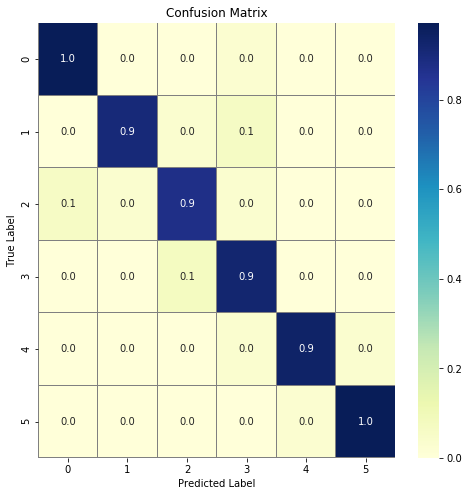

In [20]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
'''print(Y_pred_classes)
'''
Y_true = np.argmax(y_test,axis = 1)
'''print(Y_true)'''
# compute the confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="YlGnBu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Checking the prediction with the test images

TEST

Probs -> ardha matsyendrasana:0.00000 bakasana:0.00000 bitilasana:0.00005 chaturanga dandasana:0.00000 garudasana:0.00000 vriksasana:0.99995

Probability: 0.9999505281448364--> vriksasana


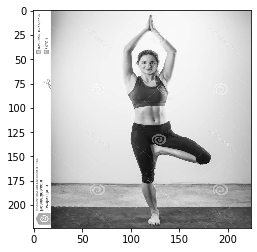

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

img = X_test[9]
pred = model.predict(np.expand_dims(img,axis=0))[0]

#print(np.expand_dims(img,axis=0).shape)
plt.imshow(Image.fromarray(img.squeeze()*255))
print('TEST')
print('')
print("Probs -> ardha matsyendrasana:{0:.5f} bakasana:{1:.5f} bitilasana:{2:.5f} chaturanga dandasana:{3:.5f} garudasana:{4:.5f} vriksasana:{5:.5f}".format(pred[0],pred[1],pred[2],pred[3],pred[4],pred[5]))
print('')
clases = ['ardha matsyendrasana','bakasana','bitilasana','chaturanga dandasana','garudasana','vriksasana']
print(f'Probability: {max(pred)}--> {clases[np.argmax(pred)]}')

# Checking with outsiders (images are not in the dataset)

In [22]:
def makeImagDf(path):
    dictionary = {}
    for paths in glob.glob(path):
        dictionary.setdefault('pose', []).append(paths.split('/')[-2])
        dictionary.setdefault('png', []).append(paths.split('/')[-1])
        dictionary.setdefault('path', []).append(paths)
        dictionary.setdefault('array', []).append(cv2.resize(cv2.imread(paths, cv2.IMREAD_GRAYSCALE),(224,224)))
    images = pd.DataFrame(dictionary)
    return images

In [26]:
data_ima = makeImagDf('../real_pics/garundanasa_2.png')

In [27]:
data_ima.head()

,pose,png,path,array
0,real_pics,garundanasa_2.png,../real_pics/garundanasa_2.png,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [28]:
outsider_img = np.stack(data_ima['array'])
outsider_img = outsider_img / 255

OUTSIDER

Probabilidades totales -> ardha matsyendrasana:0.00007 bakasana:0.00004 bitilasana:0.00000 chaturanga dandasana:0.00000 garudasana:0.99968 vriksasana:0.00021

Probability: 0.9996805191040039--> garudasana


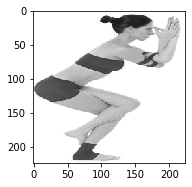

In [29]:
PIC = outsider_img # transform pic
plt.subplot(122)
plt.imshow(Image.fromarray(PIC.squeeze()*255)) # transformed pic
PIC = np.expand_dims(PIC,axis=0).reshape(np.expand_dims(PIC,axis=0).shape[0], 224, 224, 1)
pred = model.predict(PIC)[0]
print('OUTSIDER')
print('')
print("Probabilidades totales -> ardha matsyendrasana:{0:.5f} bakasana:{1:.5f} bitilasana:{2:.5f} chaturanga dandasana:{3:.5f} garudasana:{4:.5f} vriksasana:{5:.5f}".format(pred[0],pred[1],pred[2],pred[3],pred[4],pred[5]))
print('')
clases = ['ardha matsyendrasana','bakasana','bitilasana','chaturanga dandasana','garudasana','vriksasana']
print(f'Probability: {max(pred)}--> {clases[np.argmax(pred)]}')

# Save the model

In [46]:
# Save the model with h5 format
model.save('../modelos/model_h5.h5') #save model

In [48]:
# Save the model with json format
model_json = model.to_json()
with open("../modelos/model_json.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

# Checking the samples

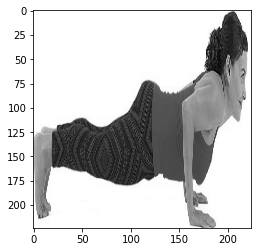

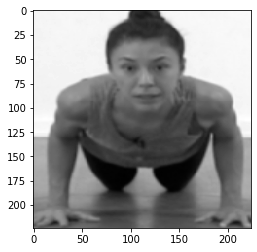

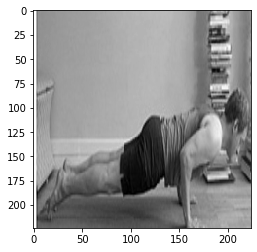

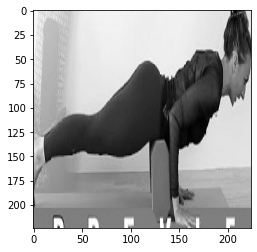

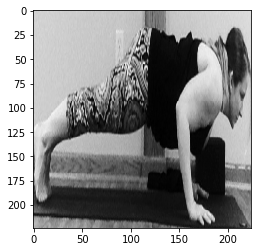

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
columns = 5
for i in range(columns):
    plt.figure()
    im = X[i]
    plt.imshow(im,cmap="gray")